<a href="https://colab.research.google.com/github/Jepees/StepAhead-Nuevo/blob/main/scripts/insight_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengenalan


| Nama                          | NIM            | Kontribusi      |
| ----------------------------- | -------------- | --------------- |
| Dani Hidayat                  | 11220940000014 | Scrap Data, Preprocessing, Insight Mining                  |
| M. Abdul Ghofur               | 11220940000020 | Preprocessing, Insight Mining, Pembuatan PPT           |
| M. Anthar Jailani Putra       | 11220940000029 | Preprocessing, Insight Mining, Presentasi Hasil        |
| M. Akhdan A'qila              | 11220940000041 | Preprocessing, Insight Mining, Presentasi Hasil        |

## Studi Kasus

Proyek ini merupakan studi kasus di mana kami berperan sebagai data scientist untuk brand sepatu lokal Nuevo. Dalam rangka merancang produk sepatu baru, Nuevo ingin memahami tren dan preferensi pasar berdasarkan percakapan dan ulasan tentang sepatu di media sosial.

Untuk itu, kami mengumpulkan dan menganalisis data dari hasil review di Tokopedia mengenai empat brand lokal terkemuka: 910, Ortuseight, Mills, dan Nuevo sendiri. Proyek ini bertujuan menggali insight mengenai aspek sepatu yang paling disukai atau dikritik, serta mencari celah yang bisa dimanfaatkan Nuevo untuk mengembangkan produk yang relevan dan kompetitif.

# Instalasi dan Importing Library

In [ ]:
!pip install Sastrawi
!pip install bertopic
!pip install unidecode
!pip install squarify
!pip install nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [101]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import string
import re

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from matplotlib.colors import LinearSegmentedColormap
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from unidecode import unidecode
from textblob import TextBlob
from bertopic import BERTopic
from html import unescape

plt.style.use('default')    # Reset style matplotlib
plt.rcdefaults()            # Reset rcParams ke default
sns.reset_defaults()        # Reset style seaborn

# Mengenal Data

In [102]:
df = pd.read_csv('https://raw.githubusercontent.com/Jepees/StepAhead-Nuevo/refs/heads/main/data/data_with_sentimen.csv')
df

,Brand,nama barang,kategori,harga,harga_int,user,varian,ukuran,date,review,rating,terbantu,label_sentimen
0,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,A***s,NaN,42.0,July 2025,Sepatunya ok dan pas dengan ukuran.. Nyampenya...,5,0,1
1,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,Z***i,NaN,42.0,July 2025,barang original enak di pakek ngebut sepatunya,5,0,1
2,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,R***i,NaN,45.0,July 2025,Bagus nyaman melebihi ekspektasi saya,5,0,1
3,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,V***u,NaN,41.0,July 2025,Produknya mantapppplll,5,1,1
4,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,Y***e,NaN,40.0,July 2025,Pengiriman cepat,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,A***e,NaN,38.0,April 2024,NaN,4,0,0
13911,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,D***i,NaN,40.0,April 2024,NaN,5,0,0
13912,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,d***a,NaN,42.0,April 2024,Lumyan,5,0,0
13913,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,r***n,NaN,41.0,April 2024,NaN,3,0,0


In [ ]:
print(f'banyaknya baris yang kosong pada masing-masing kolom:')
for col in df.columns:
    print(f'kolom {col}: {df[col].isna().sum()}')

banyaknya baris yang kosong pada masing-masing kolom:
kolom Brand: 0
kolom nama barang: 0
kolom kategori: 0
kolom harga: 0
kolom harga_int: 0
kolom user: 1
kolom varian: 4117
kolom ukuran: 25
kolom date: 0
kolom review: 457
kolom rating: 0
kolom terbantu: 0
kolom label_sentimen: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13915 entries, 0 to 13914
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           13915 non-null  object 
 1   nama barang     13915 non-null  object 
 2   kategori        13915 non-null  object 
 3   harga           13915 non-null  object 
 4   harga_int       13915 non-null  int64  
 5   user            13914 non-null  object 
 6   varian          9798 non-null   object 
 7   ukuran          13890 non-null  float64
 8   date            13915 non-null  object 
 9   review          13458 non-null  object 
 10  rating          13915 non-null  int64  
 11  terbantu        13915 non-null  int64  
 12  label_sentimen  13915 non-null  int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 1.4+ MB


In [ ]:
df['Brand'] = df['Brand'].astype('category')
df['nama barang'] = df['nama barang'].astype('category')
df['kategori'] = df['kategori'].astype('category')
df['ukuran'] = pd.to_numeric(df['ukuran'], errors='coerce').astype('Int64')
df['date'] = pd.to_datetime(df['date'], format='%B %Y').dt.strftime('%B %Y')
df['label_sentimen'] = df['label_sentimen'].map({-1: 'negatif', 0: 'netral', 1: 'positif'}).astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13915 entries, 0 to 13914
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           13915 non-null  category
 1   nama barang     13915 non-null  category
 2   kategori        13915 non-null  category
 3   harga           13915 non-null  object  
 4   harga_int       13915 non-null  int64   
 5   user            13914 non-null  object  
 6   varian          9798 non-null   object  
 7   ukuran          13890 non-null  Int64   
 8   date            13915 non-null  object  
 9   review          13458 non-null  object  
 10  rating          13915 non-null  int64   
 11  terbantu        13915 non-null  int64   
 12  label_sentimen  13915 non-null  category
dtypes: Int64(1), category(4), int64(3), object(5)
memory usage: 1.0+ MB


# Cleaning Text

In [ ]:
!mkdir -p data

# Download slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt

# slang.txt
slang_dict = {}
with open('data/slang.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line and ':' in line:
            key, value = line.split(':', 1)
            slang_dict[key.strip()] = value.strip()

# Tampilkan hasil
print(f"Total slang terms: {len(slang_dict)}")
print("Contoh slang:", list(slang_dict.items())[:10])

--2025-07-17 12:17:22--  https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) [text/plain]
Saving to: ‘data/slang.txt.2’

slang.txt.2         100%[===================>]  28.36K  --.-KB/s    in 0s      

2025-07-17 12:17:22 (95.7 MB/s) - ‘data/slang.txt.2’ saved [29041/29041]

Total slang terms: 1629
Contoh slang: [('&', 'dan'), ('1pun', 'satupun'), ('7an', 'tujuan'), ('@', 'di'), ('Dr', 'dokter'), ('Jkt', 'Jakarta'), ('Jkw', 'jokowi'), ('Napza', 'narkoba psikotropika dan zat adiktif'), ('Nasihat', 'nasehat'), ('SE', 'Surat Edaran')]


In [ ]:
# Jalankan Cell ini "HANYA" jika anda menggunakan Google Colab
# Jika di jalankan di komputer local, silahkan lihat NLPTM-02 untuk instalasinya.
import warnings; warnings.simplefilter('ignore')
import nltk

try:
    import google.colab; IN_COLAB = True
    !wget https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/taudataNlpTm.py
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/slang.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/stopwords_id.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/stopwords_en.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/kata_dasar.txt
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/wn-ind-def.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/wn-msa-all.tab
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/ind_SA.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/all_indo_man_tag_corpus_model.crf.tagger

    !pip install spacy python-crfsuite unidecode textblob sastrawi
    !python -m spacy download xx
    !python -m spacy download en_core_web_sm

    nltk.download('popular')
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

--2025-07-17 12:17:22--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py.1’

taudataNlpTm.py.1   100%[===================>]  13.67K  --.-KB/s    in 0s      

2025-07-17 12:17:22 (82.2 MB/s) - ‘taudataNlpTm.py.1’ saved [14001/14001]

mkdir: cannot create directory ‘data’: File exists
--2025-07-17 12:17:22--  https://raw.githubusercontent.com/taudataanalytics/taudata-Academy/d352ef3839f8b2d4da056dd67904bc38ce32f48e/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.c

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
# Download resource NLTK (hanya perlu sekali)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger') # This one might be enough, but eng is specific
nltk.download('averaged_perceptron_tagger_eng') # Add this line to be sure
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[

True

In [ ]:
# Melakukan penanganan slang/singkatan
def replace_slang(text,dict_slang):
    # Pastikan input adalah string
    if not isinstance(text, str):
        return text # Atau kembalikan string kosong '' atau tangani sesuai kebutuhan

    # Mengganti frasa menggunakan regex
    for slang, pengganti in dict_slang.items():
        # Menambahkan penanganan error jika pengganti bukan string
        if not isinstance(pengganti, str):
            print(f"Warning: Pengganti untuk '{slang}' bukan string: {pengganti}. Melewatkan.")
            continue # Lewati slang ini jika penggantinya tidak valid

        text = re.sub(r'\b' + re.escape(slang) + r'\b', pengganti, text) # versi tanpa ignorecase, sensitif dengan huruf kapital atau kecil
    return text

# Pastikan kolom 'review' bertipe string dan tangani nilai NaN sebelum menerapkan fungsi
df['review'] = df['review'].fillna('').astype(str)
# dikarenakan ada beberapa perbedaan format penulisan dalam dictionary slang kami maka dilakukan beberapa proses,
df['teks_slang1'] = df['review'].apply(lambda x: replace_slang(x, slang_dict)) # replace singkatan nama yang sensitive case
# Pastikan juga kolom 'teks_slang1' bertipe string sebelum apply lower() dan fungsi replace_slang lagi
df['teks_slang1'] = df['teks_slang1'].fillna('').astype(str)
df['teks_slang2'] = df['teks_slang1'].apply(lambda x: replace_slang(x.lower(), slang_dict)) # replace singkatan dengan lower

In [ ]:
# preprocessing
import taudataNlpTm as tau
from tqdm import tqdm
D = df['teks_slang2'].to_list()
# stops, lemmatizer = tau.LoadStopWords(lang='en')
for i,d in tqdm(enumerate(D)):
    D[i] = tau.cleanText(d, lemma=False, stops = False, symbols_remove = True, min_charLen = 2)
print(D[0])
df['cleaned_text'] = D
df

In [ ]:
df.sample(10)

In [ ]:
df.to_csv('text_data_preprocessed.csv', index=False)

# Impor data bersih

In [103]:
# data dibagi menjadi 2,
# df_all untuk insight mining yang menggunakan semua data
# df_text untuk insight mining yang fokus pada kolom review

df_all = df.copy()

df_text = pd.read_csv("https://raw.githubusercontent.com/Jepees/StepAhead-Nuevo/refs/heads/main/data/text_data_preprocessed.csv")
df_text = df_text[['Brand', 'nama barang', 'kategori', 'harga', 'harga_int', 'user',
       'varian', 'ukuran', 'date', 'review', 'cleaned_text', 'rating', 'terbantu',
       'label_sentimen',]]
df_text

,Brand,nama barang,kategori,harga,harga_int,user,varian,ukuran,date,review,cleaned_text,rating,terbantu,label_sentimen
0,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,A***s,NaN,NaN,July 2025,Sepatunya ok dan pas dengan ukuran.. Nyampenya...,sepatunya ok dan pas dengan ukuran nyampenya j...,5,0,positif
1,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,Z***i,NaN,NaN,July 2025,barang original enak di pakek ngebut sepatunya,barang original enak di pakai ngebut sepatunya,5,0,positif
2,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,R***i,NaN,NaN,July 2025,Bagus nyaman melebihi ekspektasi saya,bagus nyaman melebihi ekspektasi saya,5,0,positif
3,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,V***u,NaN,NaN,July 2025,Produknya mantapppplll,produknya mantappll,5,1,positif
4,910,nineten haze strike prime,sepatu lari,Rp550.905,550905,Y***e,NaN,NaN,July 2025,Pengiriman cepat,pengiriman cepat,5,0,netral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13910,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,A***e,NaN,38.0,April 2024,NaN,NaN,4,0,netral
13911,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,D***i,NaN,40.0,April 2024,NaN,NaN,5,0,netral
13912,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,d***a,NaN,42.0,April 2024,Lumyan,lumyan,5,0,netral
13913,Nuevo,nuevo siloka shadow low,sepatu lifestyle,Rp59.900,59900,r***n,NaN,41.0,April 2024,NaN,NaN,3,0,netral


# Insight Mining

## Tren Pembelian Produk Setahun Terakhir

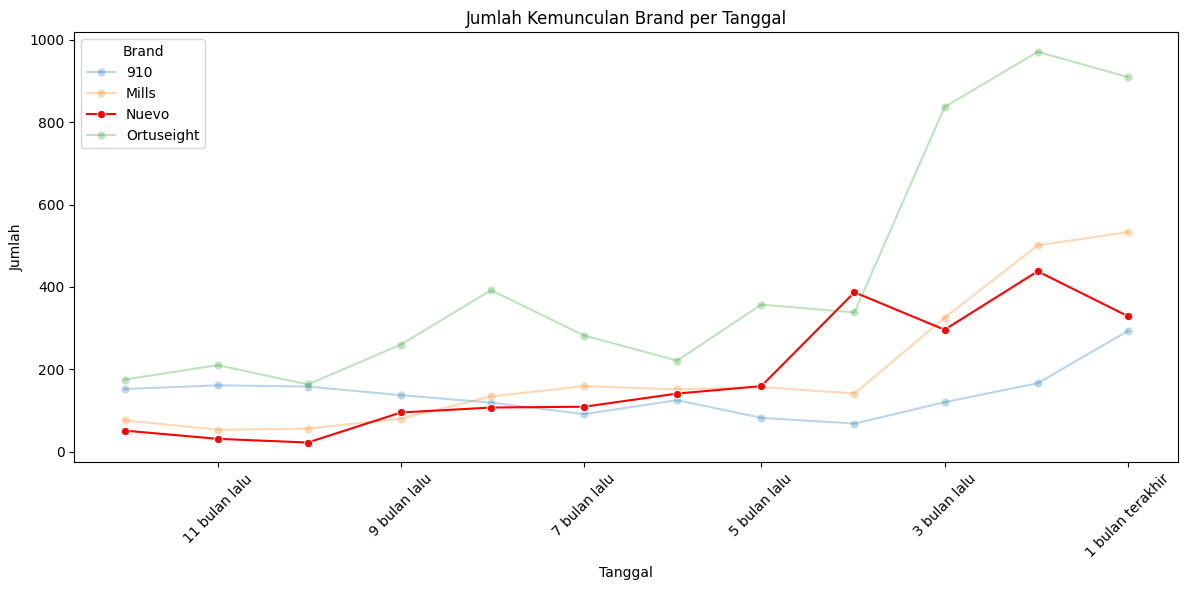

In [104]:
# Konversi tanggal
df_all['date'] = pd.to_datetime(df_all['date'])

# Hitung jumlah kategori per tanggal
df_count0 = df_all.groupby(['date', 'Brand']).size().reset_index(name='jumlah')

# Filter 12 bulan terakhir
df_count = df_count0[df_count0['date'] > pd.Timestamp("2024-07-01")]

# Buat plot
plt.figure(figsize=(12, 6))

# Plot tiap Brand dengan styling khusus
for brand in df_count['Brand'].unique():
    brand_data = df_count[df_count['Brand'] == brand]

    # Styling khusus untuk Nuevo
    if brand == 'Nuevo':
        sns.lineplot(
            data=brand_data,
            x='date',
            y='jumlah',
            label=brand,
            marker='o',
            color='red',     # warna merah
            alpha=1.0
        )
    else:
        sns.lineplot(
            data=brand_data,
            x='date',
            y='jumlah',
            label=brand,
            marker='o',
            alpha=0.3        # lebih transparan
        )

# Ambil axis dan label
ax = plt.gca()
xticks = ax.get_xticks()
xticklabels = ax.get_xticklabels()

# Tanggal referensi
today = pd.Timestamp("2025-07-01")

# Fungsi bantu untuk hitung selisih bulan
def selisih_bulan(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

# Mapping label kustom
custom_labels = {}
for label in xticklabels:
    try:
        label_date = pd.to_datetime(label.get_text())
        selisih = selisih_bulan(today, label_date)

        if selisih == 0:
            custom_labels[label_date] = "1 bulan terakhir"
        elif 1 <= selisih+1 <= 12:
            custom_labels[label_date] = f"{selisih+1} bulan lalu"
        else:
            custom_labels[label_date] = label_date.strftime("%b %Y")
    except:
        continue

# Terapkan label baru
new_labels = [custom_labels.get(pd.to_datetime(lbl.get_text()), lbl.get_text()) for lbl in xticklabels]
ax.set_xticklabels(new_labels, rotation=45)

plt.title("Jumlah Kemunculan Brand per Tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.legend(title="Brand")
plt.show()


Interpretasi:

1. Ortuseight tampil dominan secara konsisten.

  Menjadi brand yang paling sering disebut dan direview sepanjang tahun. Ini menunjukkan posisi pasar yang kuat dan stabil.

2. Mills dan 910 mengalami kenaikan tajam dalam 3 bulan terakhir.

  Kemungkinan terkait kampanye promosi baru atau peluncuran produk populer. Ini memberi sinyal bahwa keduanya mulai menggencarkan ekspansi pasar.

3. Nuevo juga mengalami kenaikan signifikan dalam 5 bulan terakhir, namun terlihat fluktuatif.

  Ada potensi pasar yang mulai merespons positif, namun masih perlu konsistensi dalam eksposur dan strategi produk agar bisa bersaing stabil seperti Ortuseight.

## Top 5-10 Penjualan Poduk masing-masing Brand

In [105]:
df_nuevo = df_all[df_all['Brand']== 'Nuevo']
df_mills = df_all[df_all['Brand']== 'Mills']
df_910 = df_all[df_all['Brand']== '910']
df_ortuseight = df_all[df_all['Brand']== 'Ortuseight']

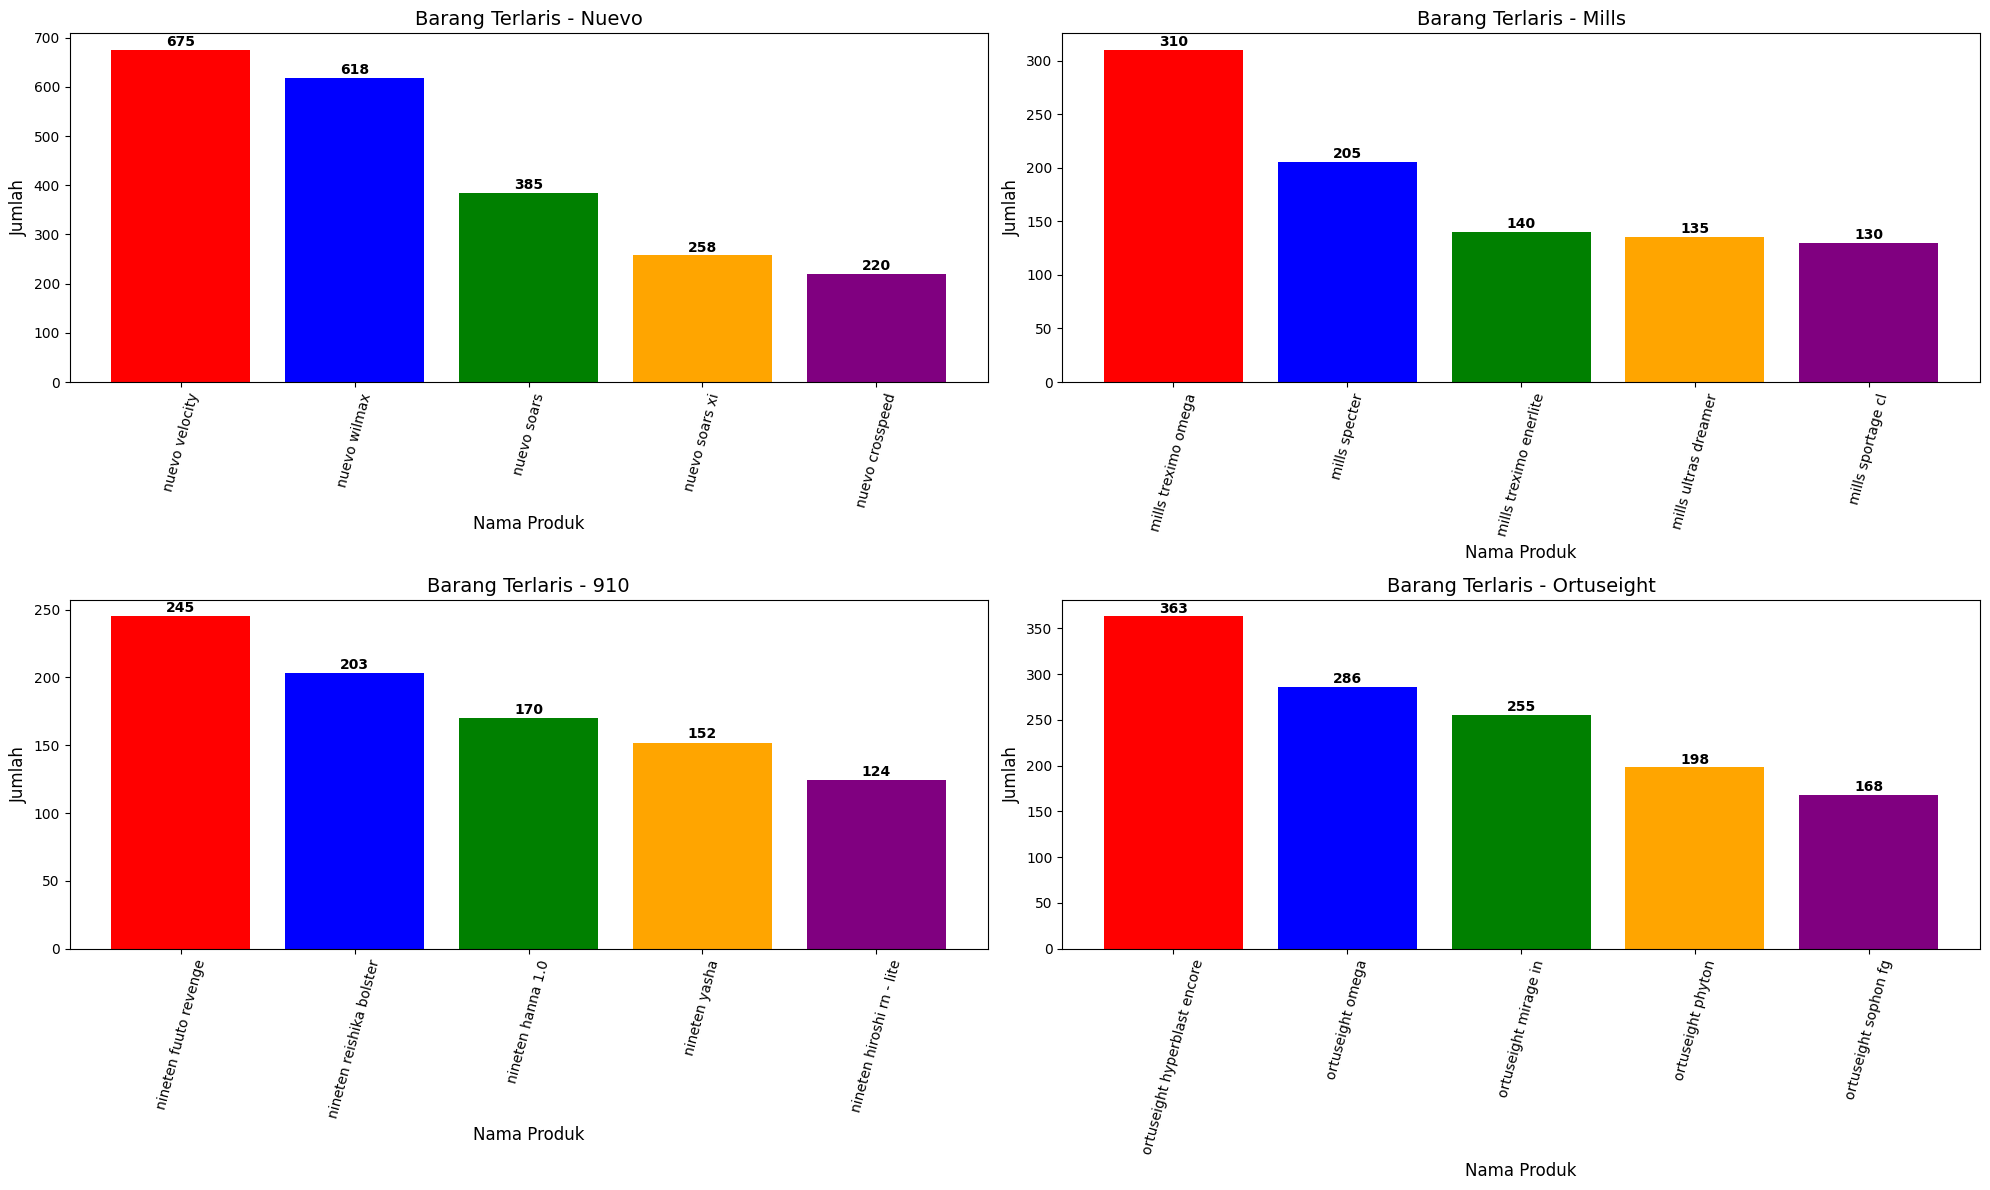

In [106]:
# Daftar DataFrame dan judul
dataframes = {
    "Nuevo": df_nuevo,
    "Mills": df_mills,
    "910": df_910,
    "Ortuseight": df_ortuseight
}

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'cyan']

# Buat figure dan axes untuk 4 subplot
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()  # ubah jadi 1D list

# Loop setiap DataFrame dan plot
for i, (brand, df) in enumerate(dataframes.items()):
    top_items = df['nama barang'].value_counts().head(5)

    # Plot bar
    bars = axes[i].bar(top_items.index, top_items.values, color=colors[:len(top_items)])

    # Tambahkan angka di atas bar
    for j, v in enumerate(top_items.values):
        axes[i].text(j, v + 1, str(v), ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Set judul dan label
    axes[i].set_title(f"Barang Terlaris - {brand}", fontsize=14)
    axes[i].set_xlabel("Nama Produk", fontsize=12)
    axes[i].set_ylabel("Jumlah", fontsize=12)
    axes[i].tick_params(axis='x', labelrotation=75)

plt.tight_layout()
plt.show()

## Rata-rata Harga Sepatu per-Brand per-Kategori

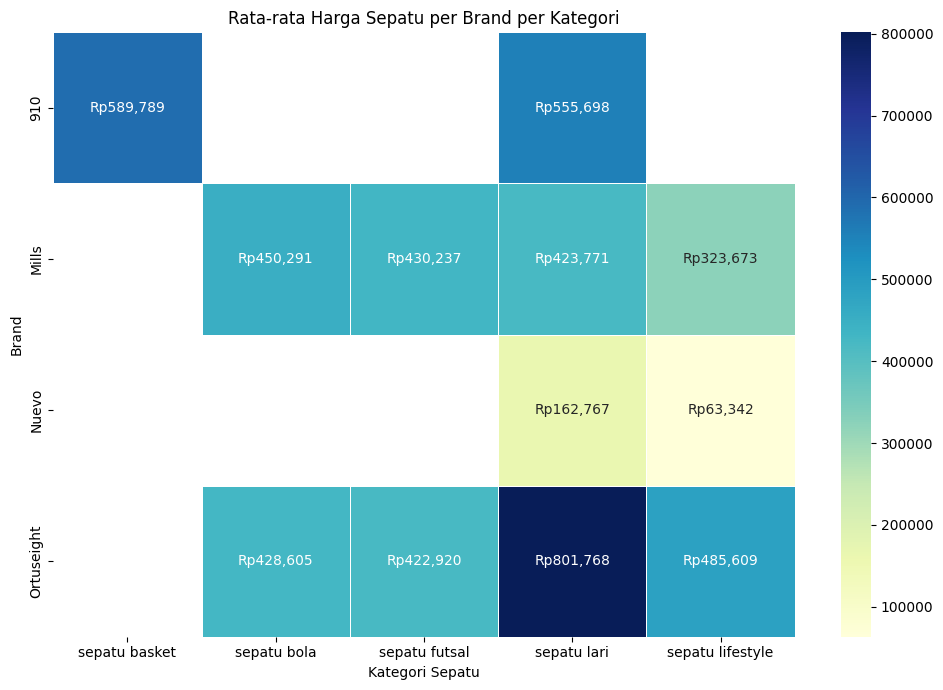

In [107]:
# Hitung rata-rata harga
rata2_harga = df_all.groupby(['Brand', 'kategori'])['harga_int'].mean()

# Ubah jadi integer hanya untuk nilai yang tidak NaN
rata2_harga_df = rata2_harga.reset_index().rename(columns={'harga_int': 'rata_rata_harga'})
rata2_harga_df['rata_rata_harga'] = rata2_harga_df['rata_rata_harga'].round(0)

# Konversi ke int hanya jika tidak NaN
rata2_harga_df['rata_rata_harga'] = rata2_harga_df['rata_rata_harga'].dropna().astype(int)

# Tampilkan hasil
rata2_harga_df

filtered_df = rata2_harga_df[rata2_harga_df['kategori'] != 'tas sepatu'].copy()

# 2. Pivot tabel
pivot = filtered_df.pivot(index='Brand', columns='kategori', values='rata_rata_harga')

# 3. Format ke label rupiah (untuk ditampilkan di annot)
annot_labels = pivot.applymap(lambda x: f"Rp{x:,.0f}" if pd.notnull(x) else '')

# 4. Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pivot, annot=annot_labels, fmt="", cmap="YlGnBu", linewidths=.5)

plt.title("Rata-rata Harga Sepatu per Brand per Kategori")
plt.xlabel("Kategori Sepatu")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

Nuevo memiliki harga rata-rata hanya Rp162.767 untuk produk sepatu lari. Angka ini jauh lebih rendah dibandingkan brand lain pada kategori yang sama:
- Ortuseight: Rp801.768
- Mills: Rp423.771
- 910: Rp555.698

Nuevo memiliki peluang untuk melakukan kampanye dengan narasi “Sepatu Lari Berkualitas Terjangkau” atau “Pertama Kali Lari? Mulai Bersama Nuevo”, menyasar pemula.

## Rata-rata Rating per Bulan setahun terakhir

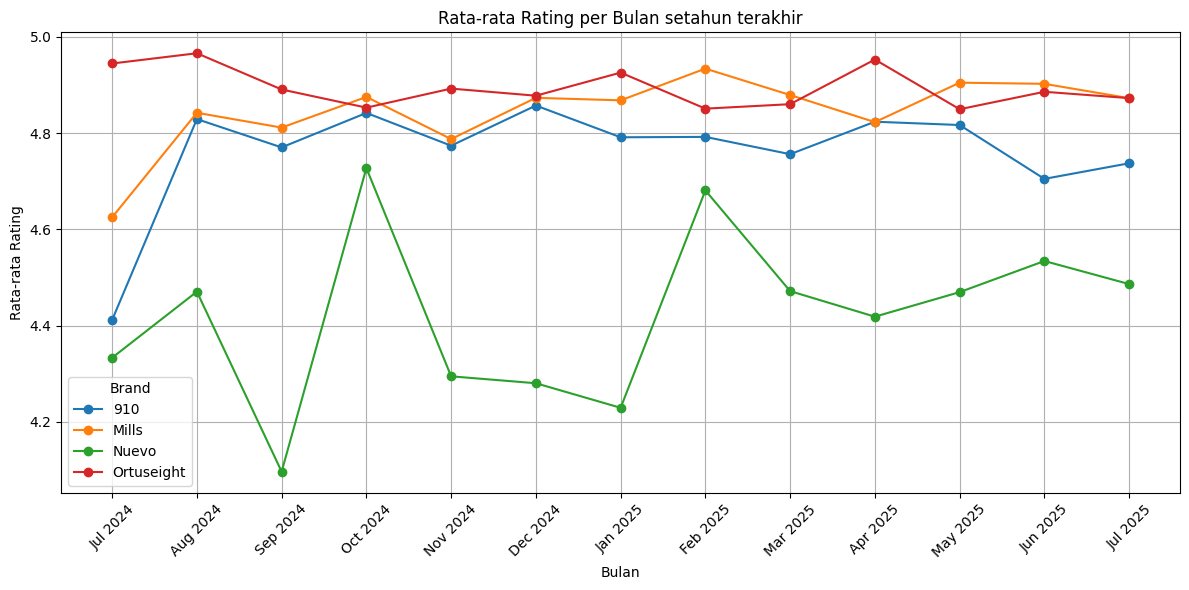

In [108]:
df_tren = df_all.copy()

# --- 1. Pra-pemrosesan ---
df_tren['date'] = pd.to_datetime(df_tren['date'], errors='coerce')
df_tren['rating'] = pd.to_numeric(df_tren['rating'], errors='coerce')
df_tren = df_tren.dropna(subset=['date', 'rating', 'Brand'])

# Ambil data mulai Juli 2024
df_tren = df_tren[df_tren['date'] >= '2024-07-01']

# Tambahkan kolom bulan (datetime) untuk urutan
df_tren['bulan_dt'] = df_tren['date'].dt.to_period('M').dt.to_timestamp()

# Tambahkan label bulan dalam format "Jan 2025"
df_tren['bulan_label'] = df_tren['bulan_dt'].dt.strftime('%b %Y')

# --- 2. Ambil 4 brand teratas ---
top_brands = df_tren['Brand'].value_counts().nlargest(4).index.tolist()
filtered_df_tren = df_tren[df_tren['Brand'].isin(top_brands)]

# --- 3. Hitung rata-rata rating per bulan per brand ---
grouped = filtered_df_tren.groupby(['bulan_dt', 'Brand'])['rating'].mean().reset_index()
pivot_df_tren = grouped.pivot(index='bulan_dt', columns='Brand', values='rating').sort_index()

# Buat label bulan untuk x-axis
bulan_labels = pivot_df_tren.index.strftime('%b %Y')

# --- 4. Plot ---
plt.figure(figsize=(12, 6))
for brand in pivot_df_tren.columns:
    plt.plot(bulan_labels, pivot_df_tren[brand], marker='o', label=brand)

plt.title('Rata-rata Rating per Bulan setahun terakhir')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

In [109]:
pivot_df_tren
df_pivot = pivot_df_tren.fillna(0).sort_index(ascending=True)
df_pivot

Brand,910,Mills,Nuevo,Ortuseight
bulan_dt,,,,
2024-07-01,4.411765,4.625000,4.333333,4.944444
2024-08-01,4.828947,4.842105,4.470588,4.965714
2024-09-01,4.770186,4.811321,4.096774,4.890476
2024-10-01,4.841772,4.875000,4.727273,4.852761
2024-11-01,4.773723,4.787500,4.294737,4.892308
2024-12-01,4.857143,4.873134,4.280374,4.877551
2025-01-01,4.791209,4.867925,4.229358,4.925532
2025-02-01,4.792000,4.933775,4.680851,4.850679
2025-03-01,4.756098,4.878981,4.471698,4.859944


Insight Khusus untuk Nuevo:

Rating Terendah yang Konsisten: Nuevo secara konsisten memiliki rata-rata rating terendah di antara keempat merek selama setahun terakhir. Ini adalah indikator utama bahwa Nuevo memiliki tantangan signifikan dalam memenuhi atau melampaui ekspektasi pelanggan dibandingkan para pesaing utamanya.

Jarak dengan Kompetitor: Jarak rating Nuevo dengan Ortuseight dan Mills sangat signifikan. Ini menunjukkan bahwa Nuevo perlu melakukan upaya besar untuk mengejar standar yang ditetapkan oleh para pesaing.



## Distribusi Sentimen per Brand

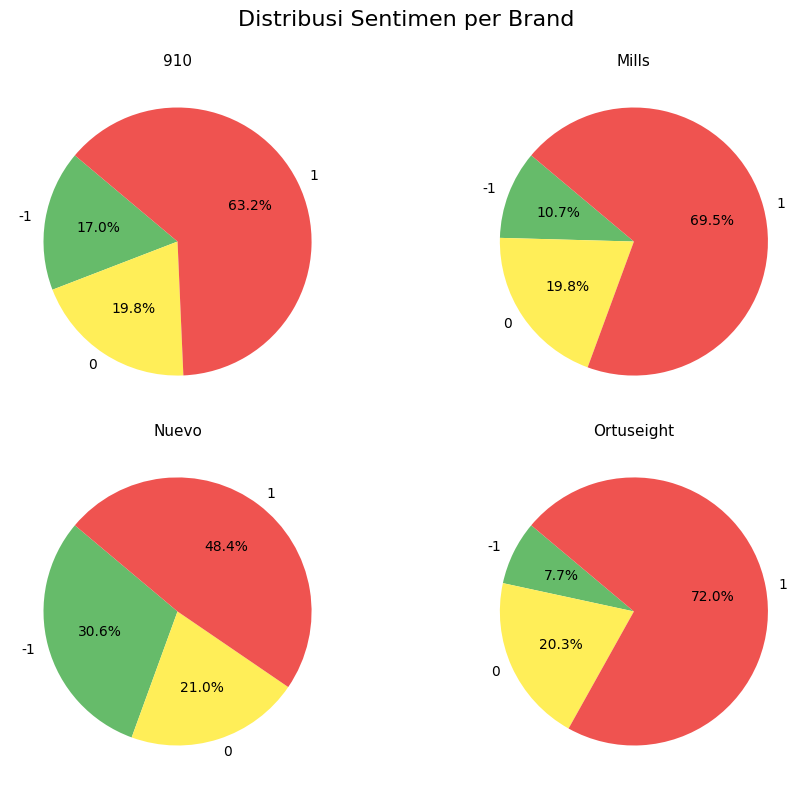

In [110]:
# Hitung distribusi label sentimen per brand
sentimen_dist = df_all.groupby('Brand')['label_sentimen'].value_counts().unstack(fill_value=0)

# Setup grid size (misal 2 baris)
n_brand = len(sentimen_dist)
cols = 2
rows = (n_brand + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

# Flatten axes untuk indexing mudah
axes = axes.flatten()

for i, brand in enumerate(sentimen_dist.index):
    ax = axes[i]
    counts = sentimen_dist.loc[brand]

    ax.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66bb6a', '#ffee58', '#ef5350']  # Positif, Netral, Negatif
    )
    ax.set_title(f'{brand}', fontsize=11)

# Kosongkan subplot sisa jika ada
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Distribusi Sentimen per Brand', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


Distribusi sentimen untuk Nuevo sangat mengkhawatirkan dan menjadi alasan utama mengapa rata-rata ratingnya jauh di bawah kompetitor.

Persentase Positif di Bawah 50%: Kurang dari separuh ulasan untuk Nuevo bersifat positif. Ini adalah kontras yang sangat tajam dengan kompetitor yang mencapai 60-70% positif.

Persentase Negatif Tertinggi: Dengan 30.6% ulasan negatif, Nuevo memiliki persentase ketidakpuasan pelanggan yang paling tinggi. Hampir sepertiga dari pelanggan yang memberikan ulasan memiliki pengalaman negatif. Ini adalah alarm besar yang harus segera diatasi.

### Topic di Sentimen Negatif di Brand Nuevo

In [111]:
df_nuevo = df_text[df_text['Brand'] == 'Nuevo']
nuevo_neg = df_nuevo[df_nuevo['label_sentimen'] == 'negatif']
texts_nuevo_neg = nuevo_neg['cleaned_text'].dropna().tolist()

topic_neg_nuevo = BERTopic(language="indonesian", calculate_probabilities=True)
topics_nuevo_neg, probs_nuevo_neg = topic_neg_nuevo.fit_transform(texts_nuevo_neg)

In [112]:
topic_neg_nuevo.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,180,-1_di_tapi_nya_yang,"[di, tapi, nya, yang, tidak, ada, kurang, suda...",[bagus semua oke saja dengan harga segitu lem ...
1,0,210,0_sepatu_sepatunya_nya_tidak,"[sepatu, sepatunya, nya, tidak, tapi, yang, ba...",[sepatu nya lumayan empuk minusnya sepatunya m...
2,1,62,1_warna_yang_dan_cat,"[warna, yang, dan, cat, warnanya, nya, bagus, ...",[bentuk dan ukuran size sesuai warna sesuai ga...
3,2,37,2_lama_pengiriman_nya_pengirimannya,"[lama, pengiriman, nya, pengirimannya, barang,...",[alhamdulillah barang sampai dengan aman dan s...
4,3,36,3_panas_bagus_tapi_enak,"[panas, bagus, tapi, enak, tidak, empuk, pakai...","[enak empuk tapi agak cepat panas, empuk cuma ..."
5,4,35,4_nya_baru_kali_sudah,"[nya, baru, kali, sudah, lem, jebol, pemakaian...","[baru pakai kali sudah terbuka lem nya, baguss..."
6,5,27,5_tidak_kurang_memuaskan_estimasi,"[tidak, kurang, memuaskan, estimasi, rapih, pu...","[kurang memuaskan, kurang memuaskan bagian dep..."
7,6,25,6_kurang_segitu_lem_harga,"[kurang, segitu, lem, harga, rapi, tetapi, dan...",[produk bagus dan nyaman tapi ada lem yang kur...
8,7,19,7_ukuran_size_min_co,"[ukuran, size, min, co, salah, datang, yang, s...",[co ukuran yang datang bahkan ukuran bagamana ...
9,8,19,8_bau_aroma_bentuk_ukuran,"[bau, aroma, bentuk, ukuran, warna, belum, day...",[bentuk dan ukuran lumayan aroma bau pewarna n...


In [113]:
for Representation in topic_neg_nuevo.get_topic_info()['Representation'].tolist():
  print(Representation)

['di', 'tapi', 'nya', 'yang', 'tidak', 'ada', 'kurang', 'sudah', 'bagus', 'sedikit']
['sepatu', 'sepatunya', 'nya', 'tidak', 'tapi', 'yang', 'bagus', 'saya', 'di', 'dan']
['warna', 'yang', 'dan', 'cat', 'warnanya', 'nya', 'bagus', 'saya', 'tidak', 'dikit']
['lama', 'pengiriman', 'nya', 'pengirimannya', 'barang', 'sampai', 'box', 'hari', 'kurirnya', 'bagus']
['panas', 'bagus', 'tapi', 'enak', 'tidak', 'empuk', 'pakai', 'harga', 'di', 'cuma']
['nya', 'baru', 'kali', 'sudah', 'lem', 'jebol', 'pemakaian', 'ambil', 'qc', 'undang']
['tidak', 'kurang', 'memuaskan', 'estimasi', 'rapih', 'puas', 'kamu', 'sesuai', 'ekspektasi', 'kecewa']
['kurang', 'segitu', 'lem', 'harga', 'rapi', 'tetapi', 'dan', 'bahan', 'bagus', 'tapi']
['ukuran', 'size', 'min', 'co', 'salah', 'datang', 'yang', 'sesuai', 'besar', 'ukurannya']
['bau', 'aroma', 'bentuk', 'ukuran', 'warna', 'belum', 'daya', 'tahan', 'lem', 'dan']
['kebesaran', 'bagus', 'cuma', 'banget', 'sih', 'tapi', 'aku', 'baguss', 'krenn', 'retur']
['panas'

Masalah terbesar berasal dari:
- Kualitas bahan dan finishing (lem, struktur sepatu)
- Kenyamanan dan desain untuk aktivitas (panas, tapak keras)
- Ketidaksesuaian ukuran dan warna dengan yang diiklankan
- Pengiriman dan ekspektasi yang tidak terpenuhi
- Sepatu cepat jebol padahal hanya beberapa kali pemakaian (kualitas)

Saran Strategis untuk Nuevo:
- Tingkatkan Quality Control (QC) → Fokus pada perekatan, finishing, dan daya tahan.
- Luncurkan seri "Ventilated Sports" → khusus untuk aktivitas intens seperti lari, dengan desain breathable dan tapak empuk.
- Revisi size chart dan sediakan fitur saran ukuran berdasarkan data pelanggan.
- Pastikan foto produk sesuai warna asli, gunakan deskripsi warna yang eksplisit.
- Tingkatkan pengemasan: gunakan box yang lebih koko.
- Beri label produk yang transparan: jelaskan apakah sepatu cocok untuk harian, olahraga ringan, atau heavy activity.
- Kampanye review pengguna: tampilkan review ukuran dan kenyamanan dari pembeli sebelumnya.

### Topic di Sentimen Positif di Brand selain Nuevo

In [114]:
df_topic = df_text[df_text['Brand'] != 'Nuevo']
df_topic = df_topic[df_topic['label_sentimen'] == 'positif']

texts_mills = df_topic[df_topic['Brand'] == "Mills"]
texts_Ortus = df_topic[df_topic['Brand'] == "Ortuseight"]
texts_910 = df_topic[df_topic['Brand'] == "910"]

# Ambil kolom teks sebagai list
texts_mills = df_topic[df_topic['Brand'] == "Mills"]['cleaned_text'].dropna().tolist()
texts_ortus = df_topic[df_topic['Brand'] == "Ortuseight"]['cleaned_text'].dropna().tolist()
texts_910 = df_topic[df_topic['Brand'] == "910"]['cleaned_text'].dropna().tolist()

# Inisialisasi model
topic_positif_mills = BERTopic(language="indonesian", calculate_probabilities=True)
topic_positif_ortus = BERTopic(language="indonesian", calculate_probabilities=True)
topic_positif_910 = BERTopic(language="indonesian", calculate_probabilities=True)

# Fit-transform
topics_mills, probs_mills = topic_positif_mills.fit_transform(texts_mills)
topics_ortus, probs_ortus = topic_positif_ortus.fit_transform(texts_ortus)
topics_910, probs_910 = topic_positif_910.fit_transform(texts_910)

#### MIlls

In [115]:
for Representation in topic_positif_mills.get_topic_info()['Representation'].tolist():
  print(Representation)

['dan', 'sesuai', 'banget', 'barang', 'pakai', 'cakep', 'pas', 'di', 'kualitas', 'dipakai']
['sepatunya', 'sepatu', 'nya', 'kaki', 'nyaman', 'pas', 'saya', 'dan', 'keren', 'enteng']
['bagus', 'good', 'one', 'nicee', 'baguss', '', '', '', '', '']
['mantap', 'sipp', 'mantaps', 'recomended', 'emejing', 'mantav', 'man', 'kelass', 'marintap', 'surantav']
['pengiriman', 'cepat', 'barang', 'fast', 'seller', 'respon', 'pesanan', 'dan', 'penjual', 'diterima']
['semoga', 'alhamdulillah', 'pass', 'awet', 'banget', 'bangett', 'suami', 'oke', 'awett', 'mantap']
['keren', 'kerenn', 'istimewa', 'gokill', 'beeuudd', 'kerensihh', 'gokss', 'sukak', 'seram', 'gacorr']
['barang', 'tidak', 'barangnya', 'bagus', 'disini', 'mengecewakan', 'beli', 'nyesel', 'worth', 'apa']
['mantab', 'mantull', 'kereenn', 'mantabb', 'tipu', 'paten', 'bgus', 'mntap', 'mantaapp', 'mantaap']
['warna', 'warnanya', 'bentuk', 'ukuran', 'color', 'dan', 'shape', 'and', 'size', 'daya']
['mills', 'sukses', 'yang', 'selalu', 'trimakasih

| Area                              | Insight Strategis                                                                                                   |
| --------------------------------- | ------------------------------------------------------------------------------------------------------------------- |
| **Kenyamanan & Ergonomi**      | Sepatu sangat nyaman, ringan, dan sesuai ukuran, pertahankan & tonjolkan dalam iklan                               |
| **Desain Fashionable**         | Banyak pujian terhadap gaya, bisa masuk pasar lifestyle, bukan hanya sport                                         |
| **Kualitas Lokal Rasa Global** | Konsumen melihat brand lokal ini bisa bersaing dengan brand besar                                                   |
| **Layanan & Pengiriman**       | Pelayanan cepat & akurat meningkatkan kepuasan                                                                      |
| **Loyal Customer Base**        | Banyak pelanggan puas, bahkan menjadi penggemar → bisa dimanfaatkan untuk program loyalitas atau referral marketing |


#### Ortuseight

In [116]:
topic_positif_ortus.get_topic_info().head(11)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,776,-1_sepatu_nyaman_sudah_untuk,"[sepatu, nyaman, sudah, untuk, tidak, banget, ...",[alhamdulillah paket nya sudah datang ini pas ...
1,0,473,0_bagus_goodd_good_baguszz,"[bagus, goodd, good, baguszz, one, goodbgt, si...","[bagus, bagus, bagus]"
2,1,273,1_mantap_sipp_besstt_banggeertt,"[mantap, sipp, besstt, banggeertt, mantapss, l...","[mantap, mantap, mantap]"
3,2,126,2_warna_warnanya_bentuk_ukuran,"[warna, warnanya, bentuk, ukuran, pas, dan, hi...","[bentuk dan ukuran pas warna bagus, bentuk dan..."
4,3,122,3_pengiriman_cepat_barang_hari,"[pengiriman, cepat, barang, hari, sesuai, juga...","[barang bagus pengiriman cepat, barang bagus p..."
5,4,81,4_baguss_perfecto_bagussd_apik,"[baguss, perfecto, bagussd, apik, perfect, , ,...","[baguss, baguss, baguss]"
6,5,78,5_keren_cool_pool_mantap,"[keren, cool, pool, mantap, , , , , , ]","[keren, keren, keren]"
7,6,68,6_mantapp_manteep_tapp_mantabh,"[mantapp, manteep, tapp, mantabh, mantafftt, b...","[mantapp, mantapp, mantapp]"
8,7,66,7_mantap_medan_ori_pokoknya,"[mantap, medan, ori, pokoknya, mantul, si, sam...",[mantapp kakak spatunyaa awet sampai saat ini ...
9,8,60,8_foto_gambar_pict_real,"[foto, gambar, pict, real, sesuai, dengan, bel...","[bagus sesuai yang di foto, barang bagus dan s..."


In [117]:
for Representation in topic_positif_ortus.get_topic_info()['Representation'].tolist():
  print(Representation)

['sepatu', 'nyaman', 'sudah', 'untuk', 'tidak', 'banget', 'nya', 'juga', 'sepatunya', 'dan']
['bagus', 'goodd', 'good', 'baguszz', 'one', 'goodbgt', 'sihh', '', '', '']
['mantap', 'sipp', 'besstt', 'banggeertt', 'mantapss', 'legit', 'muantap', 'thee', 'bosku', 'mantaps']
['warna', 'warnanya', 'bentuk', 'ukuran', 'pas', 'dan', 'hitam', 'tahan', 'daya', 'cakep']
['pengiriman', 'cepat', 'barang', 'hari', 'sesuai', 'juga', 'packing', 'kualitas', 'original', 'dan']
['baguss', 'perfecto', 'bagussd', 'apik', 'perfect', '', '', '', '', '']
['keren', 'cool', 'pool', 'mantap', '', '', '', '', '', '']
['mantapp', 'manteep', 'tapp', 'mantabh', 'mantafftt', 'bast', 'mantaabh', 'hyperdrive', 'mantepp', 'menn']
['mantap', 'medan', 'ori', 'pokoknya', 'mantul', 'si', 'sampai', 'edann', 'awam', 'assf']
['foto', 'gambar', 'pict', 'real', 'sesuai', 'dengan', 'belinya', 'di', 'yang', 'sama']
['sesuaii', 'bagus', 'all', 'uk', 'cocok', 'seluruhnya', 'muasukk', 'mantabmantab', 'selebihnya', 'kayaknya']
['kere

| Area                               | Insight Strategis                                                                                                                                                                              |
| ---------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Kenyamanan & Ergonomi**          | Banyak testimoni menyoroti kenyamanan, ukuran yang pas, dan daya tahan sepatu.                                                       |
| **Desain & Warna**                 | Kata seperti *warna, bentuk, cakep* muncul dominan → desain menjadi daya tarik utama.                                                     |
| **Pelayanan & Pengiriman**         | Kata-kata seperti *pengiriman cepat, sesuai, tepat waktu* menunjukkan pengalaman belanja yang positif.                                      |
| **Respons Positif yang Konsisten** | Variasi kata seperti *mantap, perfect, bagus, muantap, mantul*, menunjukkan kekuatan brand impression.                  |


#### 910

In [118]:
topic_positif_910.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,279,-1_barang_dan_sudah_produk,"[barang, dan, sudah, produk, banget, sesuai, l...","[barang sesuai bagus keren semoga awet, produk..."
1,0,358,0_sepatunya_sepatu_kaki_nya,"[sepatunya, sepatu, kaki, nya, banget, ringan,...","[bagus banget sepatunya, keren banget nyaman s..."
2,1,174,1_bagus_goodd_nicee_nicew,"[bagus, goodd, nicee, nicew, pkknya, bgdd, bng...","[bagus, bagus, bagus]"
3,2,109,2_mantap_recomended_sipp_ciamik,"[mantap, recomended, sipp, ciamik, manttap, na...","[mantap, mantap, mantap]"
4,3,71,3_keren_kerenn_top_bngt,"[keren, kerenn, top, bngt, kreen, lovee, pkknx...","[keren, keren, keren]"
5,4,67,4_mantaapp_mantul_mantab_joss,"[mantaapp, mantul, mantab, joss, gacorr, mntap...","[mantaapp, mantaapp , mantaapp]"
6,5,61,5_barangnya_barang_bagus_sangat,"[barangnya, barang, bagus, sangat, dan, deskri...","[bagus barangnya bagus banget, barangnya sanga..."
7,6,59,6_pengiriman_cepat_juga_barang,"[pengiriman, cepat, juga, barang, pengirimanny...","[pengiriman cepat barang bagus, bagus pengirim..."
8,7,50,7_bentuk_ukuran_pas_dan,"[bentuk, ukuran, pas, dan, ukurannya, size, se...","[bentuk dan ukuran bagus, bentuk dan ukuran ba..."
9,8,50,8_mantap_joss_kereenn_mantaap,"[mantap, joss, kereenn, mantaap, terbang, paas...",[mantapmantapmantapmantapmantapmantapmantapman...


In [119]:
for Representation in topic_positif_910.get_topic_info()['Representation'].tolist():
  print(Representation)

['barang', 'dan', 'sudah', 'produk', 'banget', 'sesuai', 'lagi', 'kualitas', 'dengan', 'tidak']
['sepatunya', 'sepatu', 'kaki', 'nya', 'banget', 'ringan', 'nyaman', 'ini', 'juga', 'yang']
['bagus', 'goodd', 'nicee', 'nicew', 'pkknya', 'bgdd', 'bngt', '', '', '']
['mantap', 'recomended', 'sipp', 'ciamik', 'manttap', 'naise', 'kelas', 'kelass', 'gagah', 'menyalaa']
['keren', 'kerenn', 'top', 'bngt', 'kreen', 'lovee', 'pkknx', 'bang', 'sukaak', 'promonya']
['mantaapp', 'mantul', 'mantab', 'joss', 'gacorr', 'mntap', 'kereenn', 'mantaap', 'kereen', 'kren']
['barangnya', 'barang', 'bagus', 'sangat', 'dan', 'deskripsi', 'sesuai', 'berkualitas', 'keluar', 'enak']
['pengiriman', 'cepat', 'juga', 'barang', 'pengirimannya', 'super', 'seller', 'bagus', 'original', 'dan']
['bentuk', 'ukuran', 'pas', 'dan', 'ukurannya', 'size', 'sesuai', 'bentuknya', 'nyaman', 'yang']
['mantap', 'joss', 'kereenn', 'mantaap', 'terbang', 'paass', 'laki', 'juara', 'bguss', 'okee']
['pesanan', 'terimakasih', 'terima', '

Kenyamanan & Ringan
- 	Banyak ulasan positif menyoroti kenyamanan, empuk, dan ringan (kata: nyaman, empuk, ringan, dipakai, cushion) → Nuevo perlu memastikan kenyamanan jadi core feature produknya, bukan sekadar desain.

Desain & Fashion Appeal
- Kata seperti cakep, keren, bentuk, cantik, warna mendominasi → desain yang atraktif dan stylish menjadi pembeda penting. Nuevo bisa eksplorasi colorway dan desain khas untuk gen Z/millennial.

Pengalaman Belanja Positif
- Pelanggan banyak menyebut pengiriman cepat, packing aman, respon admin ramah → Nuevo perlu audit internal layanan & logistik untuk menyaingi pengalaman 910.

Brand Lokal Dibanggakan
- Munculnya kata lokal, bangga, local pride menunjukkan bahwa 910 berhasil membangun narasi emosional → Nuevo bisa lebih vokal soal identitas lokal & kualitas nasional.

Kualitas Produk & Harga
- Ulasan meng-highlight bahwa dengan harga terjangkau, kualitas tetap mantap → Nuevo bisa eksplor strategi “value-for-money” tanpa mengorbankan kualitas.

Variasi & Relevansi Produk
- Kata seperti run, running, daily, recovery, desain helm, mid menunjukkan produk digunakan dalam berbagai konteks → Nuevo bisa memperluas lini produk: dari sport ke lifestyle hingga recovery shoes.

Visual Konsistensi
- Penggunaan kata foto, gambar, pict, real mengindikasikan ekspektasi konsumen akan kesesuaian produk dengan foto → Nuevo perlu menjaga konsistensi tampilan produk online vs real.

Branding Emosional
- Banyak kata ekspresif & hiperbolik seperti mantul, muantop, joss, bangeett, asli, suka → artinya 910 membangun resonansi emosional tinggi. Nuevo bisa buat campaign dengan emotion-driven storytelling.

## Barang Dengan rata-rata rating tertinggi untuk masing-masing


In [185]:
# 1. Hitung rata-rata rating dan jumlah review per produk per brand
dfrating = df_all[df_all['kategori'] == 'sepatu lari']

produk_stats = (
    dfrating.groupby(['Brand', 'nama barang'])['rating']
    .agg(rata2_rating='mean', jumlah_review='count')
    .reset_index()
)

# 2. Bulatkan rata-rata rating ke 2 angka desimal
produk_stats['rata2_rating'] = produk_stats['rata2_rating'].round(2)

# 3. Filter: hanya produk dengan jumlah review > 100
produk_filtered = produk_stats[produk_stats['jumlah_review'] > 70]

# 4. Ambil top 5 per brand
top5_per_brand = (
    produk_filtered
    .sort_values(['Brand', 'rata2_rating'], ascending=[True, False])
    .groupby('Brand', group_keys=False)
    .head(3)
)

# 5. Lihat hasil
top5_per_brand


,Brand,nama barang,rata2_rating,jumlah_review
41,910,nineten kishirun active,4.86,77
51,910,nineten yasha,4.86,152
52,910,nineten yasha kids,4.84,76
63,Mills,mills enermax nanoknit,4.92,104
72,Mills,mills sportage cl,4.92,130
78,Mills,mills treximo vision,4.90,127
81,Nuevo,nuevo soars,4.60,385
82,Nuevo,nuevo soars xi,4.57,258
79,Nuevo,nuevo crosspeed,4.55,220
86,Ortuseight,ortuseight hyperblast 2.2,4.93,73


Ini adalah penemuan yang sangat krusial. Meskipun produk-produk ini mungkin laris di pasaran (ditunjukkan oleh jumlah review yang tinggi), rata-rata ratingnya menunjukkan bahwa sebagian besar pembeli tidak sepenuhnya puas dibandingkan dengan produk populer dari merek lain. Ini berarti ada kesenjangan signifikan antara popularitas/penjualan dengan kepuasan pelanggan. Produk Nuevo yang paling populer pun masih memiliki rata-rata rating yang lebih rendah daripada produk dengan rating terendah dari kompetitor.

- Kesenjangan Kualitas/Kepuasan pada Produk Populer: Permasalahan rating rendah Nuevo bukan hanya masalah brand secara keseluruhan, tetapi juga meresap hingga ke level produk individual, bahkan pada produk yang paling banyak dibeli atau diulas. Ini menunjukkan bahwa ada aspek-aspek kunci pada produk terlaris Nuevo yang tidak memenuhi ekspektasi pelanggan.

- Popularitas Tidak Sama dengan Kepuasan: Nuevo tampaknya berhasil dalam hal menarik pembeli (dibuktikan dengan banyaknya review), namun gagal dalam hal mengubah pembeli tersebut menjadi pelanggan yang sangat puas (dibuktikan dengan rating yang rendah). Ini adalah peluang sekaligus tantangan besar.

## Kekurangan dari produk-produk dengan rating tertinggi di masing2 brand

In [154]:
df_top_mills = df_mills[df_mills['nama barang'].isin(['mills enermax nanoknit', 'mills sportage cl', 'mills treximo vision'])]
df_top_mills = df_top_mills[df_top_mills['label_sentimen'] == -1]
df_top_mills.shape

(42, 13)

In [147]:
df_top_910 = df_910[df_910['nama barang'].isin(['nineten kishirun active', 'nineten yasha', 'nineten yasha kids'])]
df_top_910 = df_top_910[df_top_910['label_sentimen'] == -1]
df_top_910.shape

(39, 13)

In [148]:
df_top_ortuseight = df_ortuseight[df_ortuseight['nama barang'].isin(['ortuseight hyperblast 2.2', 'ortuseight hyperfuse 2.2''ortuseight hyperblast encore'])]
df_top_ortuseight = df_top_ortuseight[df_top_ortuseight['label_sentimen'] == -1]
df_top_ortuseight.shape

(6, 13)

In [149]:
df_top_prod = pd.concat([df_top_ortuseight, df_top_910, df_top_mills], ignore_index=False)
df_top_prod

,Brand,nama barang,kategori,harga,harga_int,user,varian,ukuran,date,review,rating,terbantu,label_sentimen
5215,Ortuseight,ortuseight hyperblast 2.2,sepatu lari,Rp749.000,749000,P***o,White Camo,38.0,2025-05-01,Bentuk dan ukuran: 38 pas kokk Warna: white ca...,5,0,-1
5228,Ortuseight,ortuseight hyperblast 2.2,sepatu lari,Rp749.000,749000,S***j,White Camo,44.0,2025-06-01,"bagus,tali nya kek tali cangcut",5,1,-1
5229,Ortuseight,ortuseight hyperblast 2.2,sepatu lari,Rp749.000,749000,L***z,White Camo,38.0,2025-05-01,"kesel. ga sesuai pesanan. tapi, yaudahlah. unt...",3,2,-1
5236,Ortuseight,ortuseight hyperblast 2.2,sepatu lari,Rp749.000,749000,S***d,White Camo,42.0,2025-05-01,Manntap sih kak pesanannya sampai sampe tujuan...,4,0,-1
5247,Ortuseight,ortuseight hyperblast 2.2,sepatu lari,Rp749.000,749000,X***q,White Camo,44.0,2025-05-01,"mantap, kardus penyok",5,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11078,Mills,mills sportage cl,sepatu lari,Rp299.000,299000,NaN,Black/White,42.0,2025-04-01,"untuk ukurannya pas, bahan keker tapi tidak be...",5,0,-1
11079,Mills,mills sportage cl,sepatu lari,Rp299.000,299000,T***S,Black/White,42.0,2025-02-01,"lobang tali sepatunya ga ada satu, bagian atass",4,0,-1
11081,Mills,mills sportage cl,sepatu lari,Rp299.000,299000,T***S,Black/White,40.0,2025-01-01,"Mantull, sengaja naek 1 size karna suka yang l...",5,0,-1
11086,Mills,mills sportage cl,sepatu lari,Rp299.000,299000,Q***i,Black/White,37.0,2025-07-01,Salah pilih ukuran tapi barang nya bagus sesua...,4,0,-1


In [155]:
df_top_prod_texts = df_top_prod['review'].dropna().tolist()
topic_neg_top = BERTopic(language="indonesian", calculate_probabilities=True)

# Fit-transform
topics_top_neg, probs_top_neg = topic_neg_top.fit_transform(df_top_prod_texts)

In [156]:
topic_neg_top.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,0,76,0_tapi_bagus_ukuran_di,"[tapi, bagus, ukuran, di, dan, sesuai, nya, ba...","[pengiriman cepat dan aman, admin responsif, u..."
1,1,11,1_ukuran_41_kekecilan_43,"[ukuran, 41, kekecilan, 43, 44, sempit, datang...","[Kalo 43 kekecilan, kalo 44 kegedean. Saya pes..."


In [157]:
for Representation in topic_neg_top.get_topic_info()['Representation'].tolist():
  print(Representation)

['tapi', 'bagus', 'ukuran', 'di', 'dan', 'sesuai', 'nya', 'barang', 'agak', 'yg']
['ukuran', '41', 'kekecilan', '43', '44', 'sempit', 'datangnya', 'mentang', 'suami', 'yg']


dari hasil topic modeling, produk-produk yang paling tinggi rating dan paling banyak review nya kebanyakan hanya minus di ukurannya. beberapa tidak seusuai dengan ukuran yg ditampilkan di deskripsi produk.

saran untuk nuevo, berikan ukuran yg konsisten dan sesuai dengan apa yg ditampilkan di marketplace.

## Produk Nuevo yang sepi pembeli dan bereview negatif

In [137]:
# Misalkan df adalah nama DataFrame Anda
grouped_nuevo = df_nuevo.groupby('nama barang')['label_sentimen'].value_counts().unstack(fill_value=0)

# Tambahkan kolom total review
grouped_nuevo['total_review'] = grouped_nuevo.sum(axis=1)

# Urutkan berdasarkan total review (opsional)
grouped_nuevo = grouped_nuevo.sort_values(by='total_review', ascending=True)

grouped_nuevo

label_sentimen,negatif,netral,positif,total_review
nama barang,,,,
nuevo siloka shadow high,0,0,1,1
nuevo siloka shadow low,3,9,11,23
nuevo runastic,71,36,63,170
nuevo crosspeed,51,74,95,220
nuevo soars xi,70,45,143,258
nuevo soars,115,74,196,385
nuevo wilmax,171,130,317,618
nuevo velocity,237,126,312,675


In [183]:
df_all[df_all['Brand'] == 'Nuevo'][df_all[df_all['Brand'] == 'Nuevo']['kategori'] == 'sepatu lifestyle']['date'].value_counts()


,count
date,
2024-04-01,22
2024-08-01,1
2024-11-01,1


dapat dilihat bahwa produk dengan kategori lifestyle cenderung sepi peminat/pembeli, bahkan belum mendapatkan satupun review tahun ini.

kami menyarankan agar Nuevo melakukan **STOP** produksi produk-produk ini. dengan begitu Nuevo bisa menghemat pengeluaran untuk produksi tahunan.

# Kesimpulan

Berdasarkan analisis ulasan dari konsumen, disimpulkan bahwa Nuevo perlu mengoptimalkan kualitas bahan dan detail finishing seperti lem dan struktur sepatu. Selain itu, peningkatan kenyamanan dan desain untuk aktivitas sehari-hari juga penting, terutama terkait keluhan sepatu terasa panas atau tapaknya keras. Isu mengenai ketidaksesuaian ukuran dan warna dengan yang diiklankan, serta masalah pengiriman yang tidak sesuai ekspektasi, turut menjadi perhatian. Terakhir, penting bagi Nuevo untuk memastikan ketahanan produk agar tidak mudah rusak meskipun baru digunakan beberapa kali.

# Saran dan Rekomendasi Produk Baru Nuevo


 ## "Nuevo Flex Pro" – All-Day Lightweight Performance Sneaker

### Fitur Utama Produk

**Kenyamanan & Ergonomi**
- Sol empuk, ringan, dan breathable. Menggunakan foam insole dengan cushion maksimal. Fokus pada kenyamanan untuk penggunaan harian dan aktivitas ringan.

**Desain Stylish**
- Tampilan clean, kekinian, dengan variasi warna bold dan pastel yang cocok untuk Gen Z & milenial. Desain versatile: bisa masuk pasar lifestyle *dan* sport casual.

**Ukuran & Warna Konsisten**
- Sistem panduan ukuran interaktif & foto produk real shot dari berbagai sudut untuk meningkatkan akurasi ekspektasi.

**Daya Tahan & Kualitas Lokal**
- Material lokal berkualitas tinggi yang tidak mudah rusak, dilengkapi kampanye naratif: “Lokal Berkualitas, Siap Tanding.”

**Pengemasan & Pengiriman**
- Fokus pada speed dan keakuratan pengiriman. Bungkus eksklusif dan aman, dengan kartu terima kasih personal.

### Mengapa Produk Ini?

Dari brand pesaing, kami melihat:

Konsumen sangat menghargai kenyamanan yang ringan, bukan hanya desain.

Desain stylish dan fashionable membuat produk lebih luas segmennya, bukan hanya sport.

Pengalaman pengiriman & pelayanan yang positif menaikkan loyalitas.

Namun... kami juga melihat celah:

Brand lain belum ada yang secara eksplisit menggabungkan kenyamanan, fleksibilitas gaya, branding lokal, dan pelayanan yang seamless dalam satu produk.